In [1]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving TSLA.csv to TSLA.csv


In [3]:
# Store the data into a data frame
df = pd.read_csv("TSLA.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-09,855.119995,859.799988,841.750000,849.460022,849.460022,15157700
1,2021-02-10,843.640015,844.820007,800.020020,804.820007,804.820007,36216100
2,2021-02-11,812.440002,829.880005,801.729980,811.659973,811.659973,21622800
3,2021-02-12,801.260010,817.330017,785.330017,816.119995,816.119995,23768300
4,2021-02-16,818.000000,821.000000,792.440002,796.219971,796.219971,19802300


In [4]:
# Display last 5 stock prices
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
249,2022-02-03,882.000000,937.000000,880.520020,891.140015,891.140015,26285200
250,2022-02-04,897.219971,936.500000,881.169983,923.320007,923.320007,24472600
251,2022-02-07,923.789978,947.770020,902.710022,907.340027,907.340027,20331500
252,2022-02-08,905.530029,926.289978,894.799988,922.000000,922.000000,16909700
253,2022-02-09,935.000000,946.269897,922.090027,932.000000,932.000000,17058908


In [5]:
# Display last 5 stock prices
len(df)

254

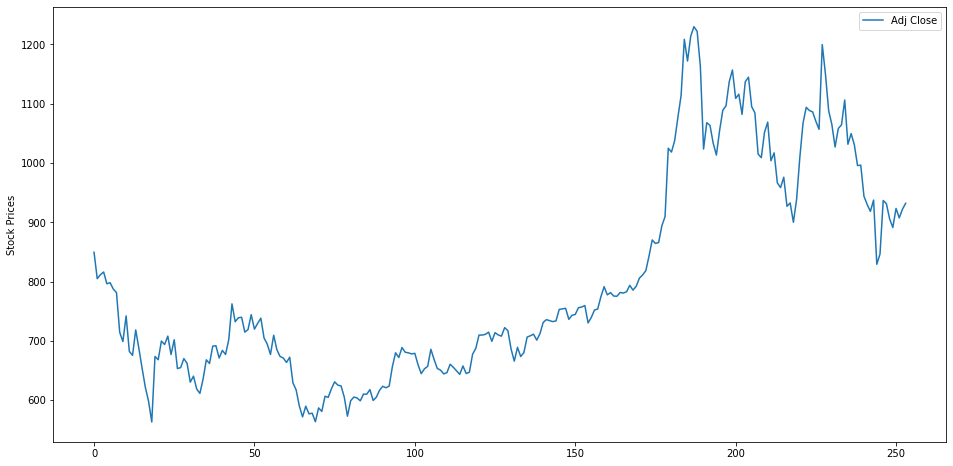

In [6]:
# Visualize Adjusted CLose Stock Prices
df = df[["Adj Close"]]
df.plot(figsize=(16,8))
plt.ylabel("Stock Prices")
plt.show()

In [7]:
df["S_30"] = df["Adj Close"].shift(1).rolling(window=30).mean()
df["S_90"] = df["Adj Close"].shift(1).rolling(window=90).mean()
df = df.dropna() 
x = df[['S_30','S_90']] 
x.head()

,S_30,S_90
90,605.752002,668.540333
91,604.411003,666.027555
92,602.693003,663.983222
93,602.515338,661.894889
94,603.827671,660.122112


In [8]:
# Define dependent variable
y = df["Adj Close"]

In [9]:
# Split the data into train set and test dateset // 85% of the dataset is used for testing
t = int(len(df) * 0.85)
xtrain = x[:t]
ytrain = y[:t]
xtest = x[t:]
ytest = y[t:]

In [10]:
# Create Linear Regression model
linear = LinearRegression().fit(xtrain,ytrain)

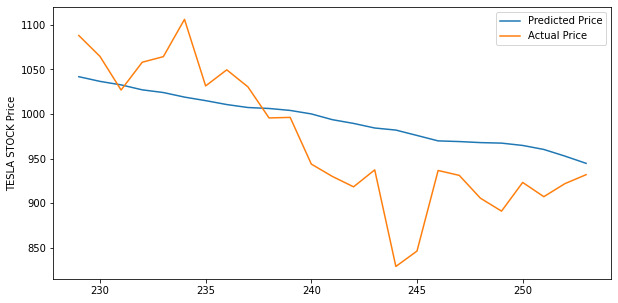

In [11]:
# Predict and visualize stock price
predicted_price = linear.predict(xtest)  
predicted_price = pd.DataFrame(predicted_price,index=ytest.index,columns = ['price'])  
predicted_price.plot(figsize=(10,5))  
ytest.plot()  
plt.legend(['Predicted Price','Actual Price'])  
plt.ylabel("TESLA STOCK Price")  
plt.show()

In [12]:
#Calculate MAE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, predicted_price))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, predicted_price)))

Mean Absolute Error: 48.150509460316535
Root Mean Squared Error: 59.396747315974764
